In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
data = ImageDataBunch.from_folder(path='./art-text-plant/', ds_tfms=get_transforms(), size=256, bs=16)

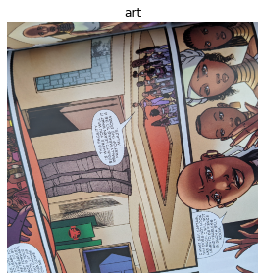

In [3]:
data.show_batch(rows=1)

In [4]:
learn = cnn_learner(data, models.squeezenet1_1, metrics=error_rate)

In [5]:
learn.fit_one_cycle(4)
learn.unfreeze()


epoch,train_loss,valid_loss,error_rate,time
0,0.526228,0.009825,0.000000,00:29
1,0.249277,0.151597,0.166667,00:29
2,0.150319,0.091623,0.000000,00:28
3,0.106117,0.103478,0.000000,00:30


learn.lr_find()
learn.recorder.plot()

In [6]:
learn.fit_one_cycle(4, max_lr=slice(1e-7,1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.028365,0.054009,0.000000,00:29
1,0.012996,0.064737,0.000000,00:29
2,0.015675,0.086543,0.000000,00:29
3,0.012332,0.063511,0.000000,00:29


In [7]:
#learn.save('./art-text-plant-squeezenet11')

In [8]:
interp = ClassificationInterpretation.from_learner(learn)

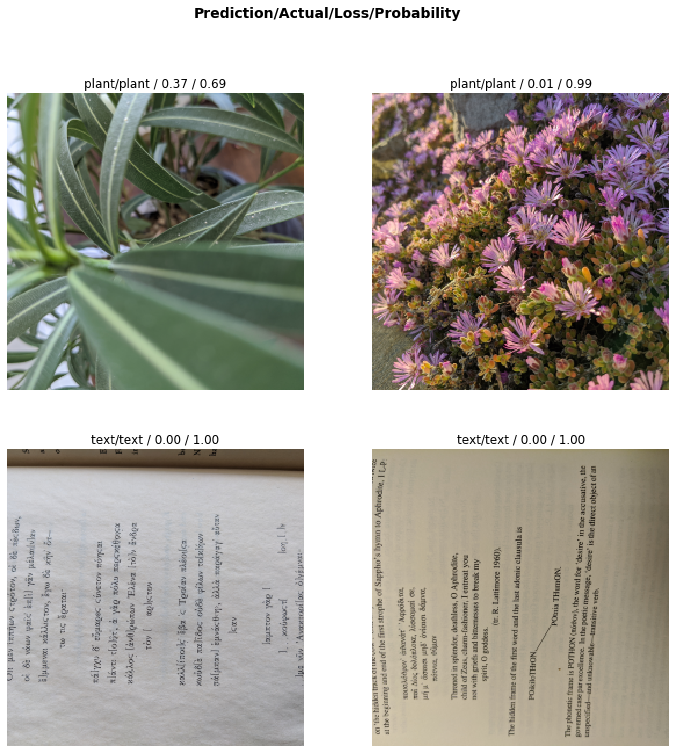

In [9]:
interp.plot_top_losses(4)

In [10]:
learn.save('./art-text-plant-to11', with_opt=False)

In [11]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
      (3): Fire(
        (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace=True)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): ReLU(inplace=True)
        (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (expand3x3_activation): ReLU(inplace=True)
      )
      (4): Fire(
        (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace=True)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): ReLU(inplace=True)
        (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (expand3x3_activa

In [12]:
import torch.onnx

In [13]:
doc(torch.onnx.export)

In [ ]:
# todo --- export this model to onnx, and use onnx.js with react-webcam to discern art vs text vs plant